In [14]:
import nibabel as nib
from pathlib import Path
import numpy as np
import json

In [ ]:
import torch

a = torch.ones((3,36,10,448,204))
b = torch.ones((3,204,448)).transpose(1, 2)
b = b.unsqueeze(1).unsqueeze(1)
a * b
    

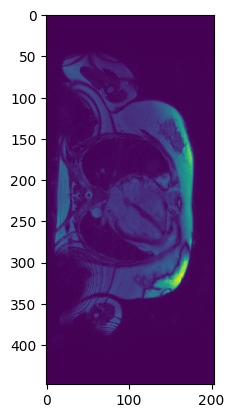

In [15]:
import h5py
import matplotlib.pyplot as plt

with h5py.File("/homes/ljchen/data/cmrecon_temp/P001.h5py") as f:
    a = np.array(f["reconstruction_rss"])
    plt.imshow(a[0])
    plt.show()
